In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [57]:
data=pd.read_csv("Cars-RF.csv")
data

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc
...,...,...,...,...,...,...,...
1722,low,low,5more,more,med,med,good
1723,low,low,5more,more,med,high,vgood
1724,low,low,5more,more,big,low,unacc
1725,low,low,5more,more,big,med,good


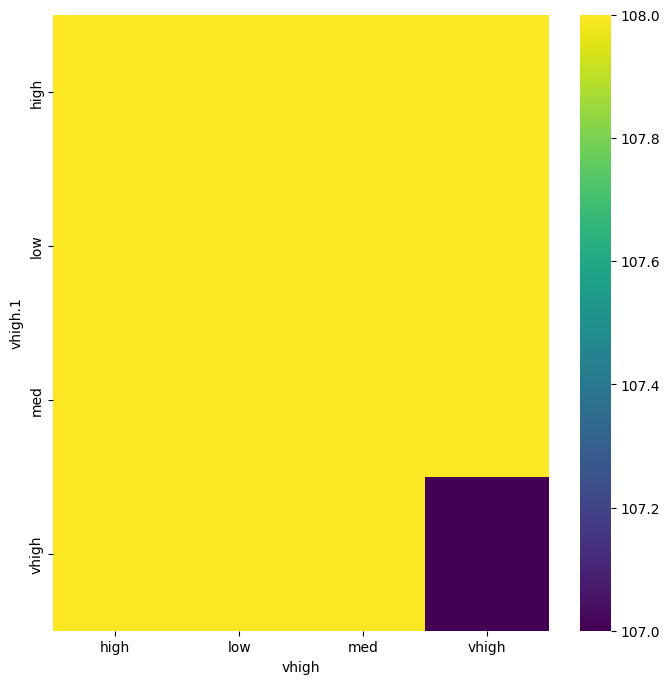

In [59]:
# @title vhigh vs vhigh.1

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['vhigh.1'].value_counts()
    for x_label, grp in data.groupby('vhigh')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('vhigh')
_ = plt.ylabel('vhigh.1')

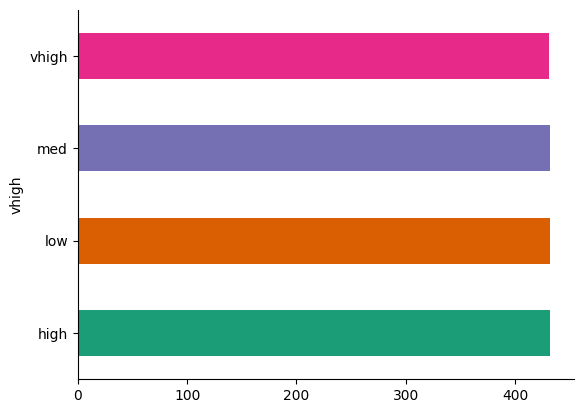

In [58]:
# @title vhigh

from matplotlib import pyplot as plt
import seaborn as sns
data.groupby('vhigh').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [22]:
from sklearn.preprocessing import OrdinalEncoder
ord_encoder = OrdinalEncoder()
data= ord_encoder.fit_transform(data)

In [23]:
data=pd.DataFrame(data)

In [24]:
data.rename(columns={'vhigh.1':'vhigh1'}, inplace=True)

In [25]:
col_names = ['Cost', 'Maintenance', 'Doors', 'Persons', 'Luggage boot', 'Safety', 'Class']
data.columns = col_names

In [26]:
data

,Cost,Maintenance,Doors,Persons,Luggage boot,Safety,Class
0,3.0,3.0,0.0,0.0,2.0,2.0,2.0
1,3.0,3.0,0.0,0.0,2.0,0.0,2.0
2,3.0,3.0,0.0,0.0,1.0,1.0,2.0
3,3.0,3.0,0.0,0.0,1.0,2.0,2.0
4,3.0,3.0,0.0,0.0,1.0,0.0,2.0
...,...,...,...,...,...,...,...
1722,1.0,1.0,3.0,2.0,1.0,2.0,1.0
1723,1.0,1.0,3.0,2.0,1.0,0.0,3.0
1724,1.0,1.0,3.0,2.0,0.0,1.0,2.0
1725,1.0,1.0,3.0,2.0,0.0,2.0,1.0


In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1727 entries, 0 to 1726
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Cost          1727 non-null   float64
 1   Maintenance   1727 non-null   float64
 2   Doors         1727 non-null   float64
 3   Persons       1727 non-null   float64
 4   Luggage boot  1727 non-null   float64
 5   Safety        1727 non-null   float64
 6   Class         1727 non-null   float64
dtypes: float64(7)
memory usage: 94.6 KB


In [28]:
data.describe()

,Cost,Maintenance,Doors,Persons,Luggage boot,Safety,Class
count,1727.000000,1727.000000,1727.000000,1727.000000,1727.000000,1727.00000,1727.000000
mean,1.499131,1.499131,1.500869,1.000579,0.999421,1.00000,1.552982
std,1.118098,1.118098,1.118098,0.816615,0.816615,0.81697,0.876136
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,0.500000,0.500000,1.000000,0.000000,0.000000,0.00000,1.000000
50%,1.000000,1.000000,2.000000,1.000000,1.000000,1.00000,2.000000
75%,2.000000,2.000000,2.500000,2.000000,2.000000,2.00000,2.000000
max,3.000000,3.000000,3.000000,2.000000,2.000000,2.00000,3.000000


In [29]:
data.isnull().any()

Cost            False
Maintenance     False
Doors           False
Persons         False
Luggage boot    False
Safety          False
Class           False
dtype: bool

In [32]:
x

array([[3., 3., 0., 0., 2., 2.],
       [3., 3., 0., 0., 2., 0.],
       [3., 3., 0., 0., 1., 1.],
       ...,
       [1., 1., 3., 2., 0., 1.],
       [1., 1., 3., 2., 0., 2.],
       [1., 1., 3., 2., 0., 0.]])

In [33]:
X = data.drop('Class', axis=1)
y = data['Class']

In [37]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [38]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1381, 18), (346, 18), (1381,), (346,))

In [39]:
y

0       2.0
1       2.0
2       2.0
3       2.0
4       2.0
       ... 
1722    1.0
1723    3.0
1724    2.0
1725    1.0
1726    3.0
Name: Class, Length: 1727, dtype: float64

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y= le.fit_transform(y)


In [ ]:
print(y)

[2 2 2 ... 2 1 3]


In [40]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [43]:
rfc = RandomForestClassifier(n_estimators=10, random_state=0)
rfc.fit(X_train, y_train)


RandomForestClassifier(n_estimators=10, random_state=0)

In [46]:
y_pred = rfc.predict(X_test)
y_pred

array([2., 2., 2., 0., 2., 2., 2., 2., 2., 2., 0., 2., 2., 2., 2., 2., 2.,
       2., 2., 3., 2., 2., 0., 2., 2., 0., 2., 2., 2., 2., 0., 2., 2., 1.,
       2., 2., 1., 2., 2., 3., 0., 0., 2., 2., 0., 0., 2., 2., 2., 2., 2.,
       2., 0., 0., 2., 2., 2., 2., 2., 0., 2., 2., 2., 2., 2., 3., 2., 2.,
       3., 2., 0., 0., 2., 2., 2., 0., 2., 2., 2., 2., 3., 2., 2., 0., 2.,
       0., 2., 2., 0., 0., 2., 1., 2., 2., 2., 2., 2., 2., 2., 0., 2., 2.,
       2., 2., 2., 1., 0., 2., 2., 0., 2., 0., 2., 2., 0., 2., 2., 2., 2.,
       2., 2., 0., 2., 0., 0., 2., 1., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 0., 2., 0., 0., 0., 2., 2., 0., 2., 0., 3., 2.,
       2., 2., 2., 2., 2., 2., 2., 0., 0., 2., 3., 2., 3., 0., 0., 2., 3.,
       0., 2., 3., 2., 0., 0., 3., 2., 0., 2., 0., 2., 2., 0., 1., 2., 2.,
       2., 2., 2., 2., 0., 0., 2., 2., 2., 0., 2., 2., 2., 2., 2., 2., 3.,
       2., 0., 2., 0., 2., 3., 2., 2., 0., 2., 2., 2., 2., 2., 2., 3., 3.,
       2., 2., 0., 3., 0.

In [50]:
from sklearn.metrics import confusion_matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Confusion Matrix:
[[ 73   1   1   2]
 [  1   9   0   5]
 [  3   0 234   0]
 [  3   0   0  14]]


In [52]:
from sklearn.metrics import classification_report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

         0.0       0.91      0.95      0.93        77
         1.0       0.90      0.60      0.72        15
         2.0       1.00      0.99      0.99       237
         3.0       0.67      0.82      0.74        17

    accuracy                           0.95       346
   macro avg       0.87      0.84      0.84       346
weighted avg       0.96      0.95      0.95       346



In [56]:
accuracy_dt = accuracy_score(y_test, y_pred)
accuracy_dt

0.953757225433526